# Spanish A/B Testing

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import textwrap
import sys
import jupyterthemes
import scipy.stats as stats
from jupyterthemes import jtplot
jtplot.style(theme= 'monokai', context = 'notebook', ticks = True, grid = True)
%matplotlib inline

In [2]:
user = pd.read_csv('user_table.csv')

In [3]:
test = pd.read_csv('test_table.csv')

In [4]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [5]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [7]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [8]:
test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [9]:
df = pd.merge(user, test, on = 'user_id', how = 'right')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   sex               452867 non-null  object 
 2   age               452867 non-null  float64
 3   country           452867 non-null  object 
 4   date              453321 non-null  object 
 5   source            453321 non-null  object 
 6   device            453321 non-null  object 
 7   browser_language  453321 non-null  object 
 8   ads_channel       181877 non-null  object 
 9   browser           453321 non-null  object 
 10  conversion        453321 non-null  int64  
 11  test              453321 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [12]:
df.head()

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20.0,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27.0,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23.0,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27.0,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20.0,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0


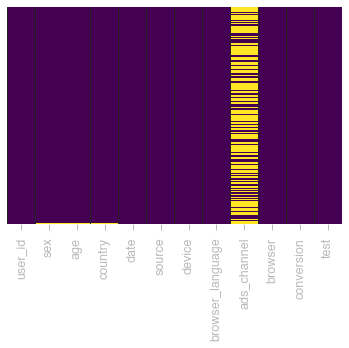

In [13]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = False, cmap = 'viridis')

In [14]:
df[df['sex'].isnull()]

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
452867,657841,NaN,NaN,NaN,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0
452868,859340,NaN,NaN,NaN,2015-12-04,Direct,Mobile,EN,NaN,Android_App,0,0
452869,716487,NaN,NaN,NaN,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,0
452870,87209,NaN,NaN,NaN,2015-12-01,Direct,Web,ES,NaN,Chrome,0,0
452871,771642,NaN,NaN,NaN,2015-11-30,SEO,Mobile,ES,NaN,Android_App,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
453316,490883,NaN,NaN,NaN,2015-12-01,Direct,Mobile,EN,NaN,Android_App,0,1
453317,741971,NaN,NaN,NaN,2015-11-30,SEO,Web,ES,NaN,Chrome,0,1
453318,722387,NaN,NaN,NaN,2015-11-30,SEO,Web,ES,NaN,FireFox,0,1
453319,752632,NaN,NaN,NaN,2015-12-04,Ads,Web,ES,Google,IE,0,1


In [15]:
df = df.drop('ads_channel', axis = 1)

In [17]:
df.dropna(inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 452866
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           452867 non-null  int64  
 1   sex               452867 non-null  object 
 2   age               452867 non-null  float64
 3   country           452867 non-null  object 
 4   date              452867 non-null  object 
 5   source            452867 non-null  object 
 6   device            452867 non-null  object 
 7   browser_language  452867 non-null  object 
 8   browser           452867 non-null  object 
 9   conversion        452867 non-null  int64  
 10  test              452867 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 41.5+ MB


In [49]:
df['browser_language'].value_counts()

ES       377160
EN        63079
Other     12628
Name: browser_language, dtype: int64

In [50]:
df = df[df['browser_language'] == 'ES']

In [51]:
control = df[df['test'] == 0]
test = df[df['test'] == 1]

In [52]:
control.describe()

,user_id,age,conversion,test
count,197562.000000,197562.000000,197562.000000,197562.0
mean,500544.015084,27.141181,0.055431,0.0
std,288964.614671,6.791709,0.228820,0.0
min,2.000000,18.000000,0.000000,0.0
25%,249898.250000,22.000000,0.000000,0.0
50%,501192.000000,26.000000,0.000000,0.0
75%,750578.000000,31.000000,0.000000,0.0
max,1000000.000000,68.000000,1.000000,0.0


In [21]:
test.describe()

,user_id,age,conversion,test
count,215774.000000,215774.000000,215774.000000,215774.0
mean,499483.813462,27.115236,0.043411,1.0
std,288529.156089,6.762929,0.203781,0.0
min,3.000000,18.000000,0.000000,1.0
25%,249801.750000,22.000000,0.000000,1.0
50%,499125.000000,26.000000,0.000000,1.0
75%,748968.750000,31.000000,0.000000,1.0
max,999999.000000,70.000000,1.000000,1.0


### Looking at the control and experiment groups wholistically
H0: con.conversion_rate = exp.conversion_rate 
<br>
HA: con.conversion_rate > exp.conversion_rate

In [35]:
def two_proprotions_ztest(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side
    return zscore, pvalue

In [53]:
con_success = sum(control['conversion'] == 1)
con_size = control.iloc[:,0].count()
exp_success = sum(test['conversion'] == 1)
exp_size = test.iloc[:,0].count()

In [54]:
zscore, pvalue = two_proprotions_ztest(con_success, con_size, exp_success, exp_size)
print('zscore = {:.3f}, pvalue = {:.4f}'.format(zscore, pvalue))


zscore = 16.801, pvalue = 0.0000


As pvalue < 0.05, we reject the null hypothesis and conclude that when just looking at conversion rate across the board, 
<br>
it does appear that the old version of the site with just one translation across Spain and LATAM performs better in terms of conversion rate.

### Are users randomly assigned to control vs experiment group?

Text(0.5, 0, 'age')

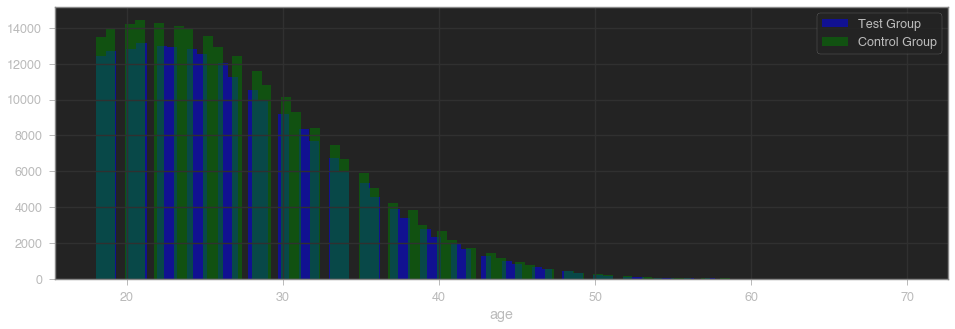

In [47]:
plt.figure(figsize = (16,5))
df[df['test'] == 1]['age'].hist(bins = 80, color = 'blue', 
                                                 alpha = 0.5, label = 'Test Group')
df[df['test'] == 0]['age'].hist(bins = 80, color = 'green', 
                                                 alpha = 0.5, label = 'Control Group')
plt.legend()
plt.xlabel('age')

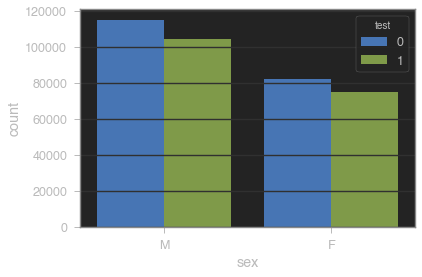

In [59]:
sns.countplot(x = 'sex', hue = 'test', data = df)

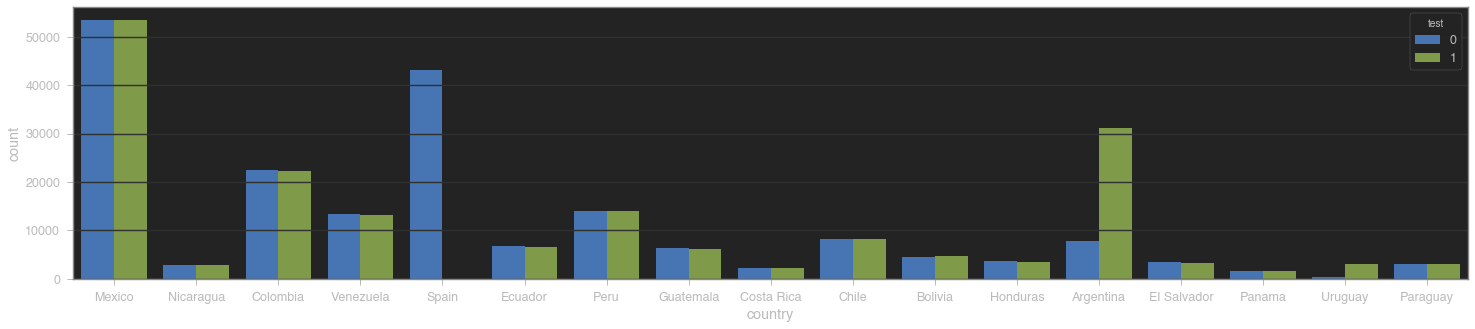

In [60]:
plt.figure(figsize = (25,5))
sns.countplot(x = 'country', hue = 'test', data = df)

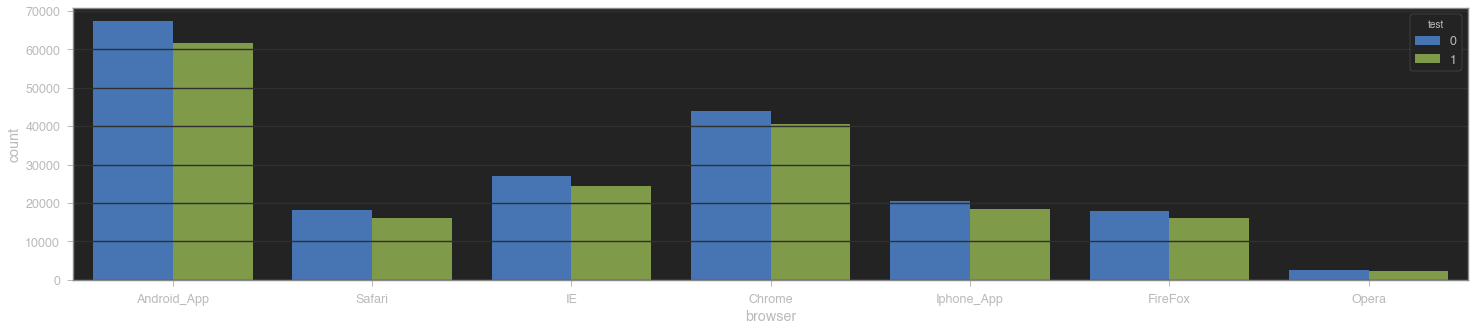

In [61]:
plt.figure(figsize = (25,5))
sns.countplot(x = 'browser', hue = 'test', data = df)

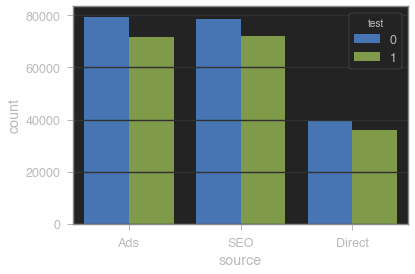

In [63]:

sns.countplot(x = 'source', hue = 'test', data = df)

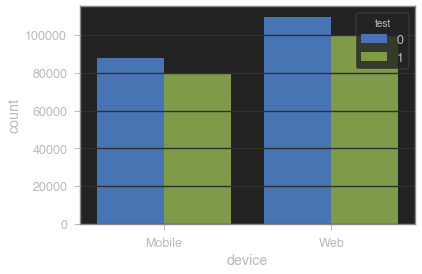

In [64]:
sns.countplot(x = 'device', hue = 'test', data = df)

### Let's try taking out Spain

In [65]:
df1 = df[df['country'] != 'Spain']

In [67]:
df1['country'].value_counts()

Mexico         107086
Colombia        44850
Argentina       38997
Peru            28000
Venezuela       26733
Chile           16433
Ecuador         13262
Guatemala       12610
Bolivia          9254
Honduras         7167
El Salvador      6775
Paraguay         6089
Nicaragua        5636
Costa Rica       4378
Uruguay          3454
Panama           3290
Name: country, dtype: int64

,user_id,age,conversion,test
count,334014.000000,334014.000000,334014.000000,334014.000000
mean,499896.217206,27.124707,0.045878,0.537696
std,288757.832709,6.781171,0.209221,0.498578
min,2.000000,18.000000,0.000000,0.000000
25%,249900.250000,22.000000,0.000000,0.000000
50%,499772.000000,26.000000,0.000000,1.000000
75%,749800.250000,31.000000,0.000000,1.000000
max,1000000.000000,66.000000,1.000000,1.000000


In [88]:
control = df1[df1['test'] == 0]
test = df1[df1['test'] == 1]
con_success = sum(control['conversion'] == 1)
con_size = control.iloc[:,0].count()
exp_success = sum(test['conversion'] == 1)
exp_size = test.iloc[:,0].count()

In [89]:
print('Control Conversion',control['conversion'].mean())
print('Experiment Conversion',test['conversion'].mean())

Control Conversion 0.04862190446585846
Experiment Conversion 0.04351941558369247


In [69]:
zscore, pvalue = two_proprotions_ztest(con_success, con_size, exp_success, exp_size)
print('zscore = {:.3f}, pvalue = {:.4f}'.format(zscore, pvalue))


zscore = 7.027, pvalue = 0.0000


Z score is significantly lower but pvalue is still < 0.05

### Let's explore segmentation of geolocation

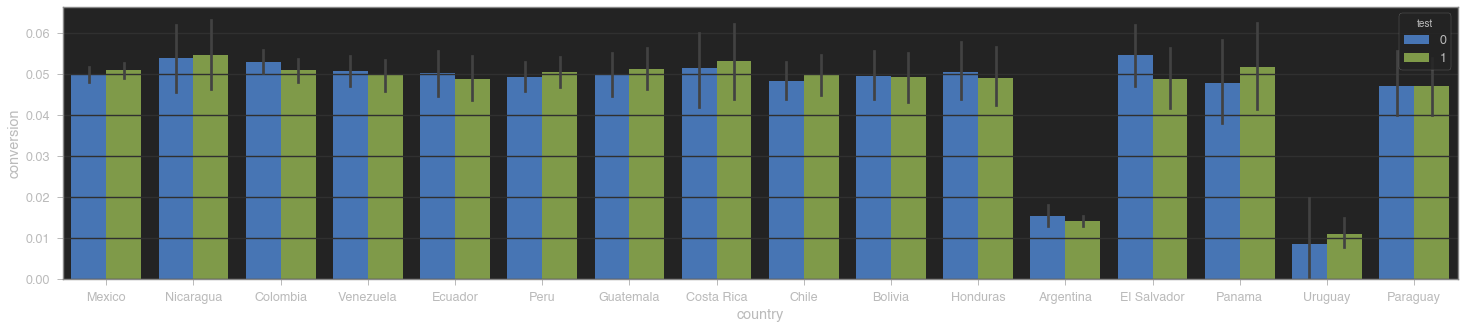

In [73]:
plt.figure(figsize = (25,5))
sns.barplot(x = 'country', y = 'conversion', hue = 'test', data = df1)

The conversion rate seems to differ quite a bit for El Salcador, Panama and Uruguay

In [74]:
countries = df1['country'].unique()

In [81]:
type(countries[1])

str

In [84]:
print('{0:15s} {1:>15s} {2:>10s}'.format('Country', 'Z-score', 'pvalue'))
print('-' * 65)
for c in countries:
    control = df1[(df1['test'] == 0) & (df1['country'] == c)]
    test = df1[(df1['test'] == 1) & (df1['country'] == c)]
    con_success = sum(control['conversion'] == 1)
    con_size = control.iloc[:,0].count()
    exp_success = sum(test['conversion'] == 1)
    exp_size = test.iloc[:,0].count()
    zscore, pvalue = two_proprotions_ztest(con_success, con_size, exp_success, exp_size)
    print('{0:15s} {1:15.5f} {2:10f}'.format(c, zscore, pvalue))

Country                 Z-score     pvalue
Mexico                  0.72189   0.235182
Nicaragua               0.09042   0.463975
Colombia                0.89362   0.185762
Venezuela               0.32982   0.370766
Ecuador                 0.42348   0.335972
Peru                    0.41162   0.340307
Guatemala               0.36087   0.359100
Costa Rica              0.25335   0.399998
Chile                   0.41411   0.339396
Bolivia                 0.03224   0.487142
Honduras                0.31330   0.377025
Argentina               0.88338   0.188515
El Salvador             1.07620   0.140919
Panama                  0.50513   0.306735
Uruguay                 0.44226   0.329150
Paraguay                0.03236   0.487093


### Let's explore more about time factor

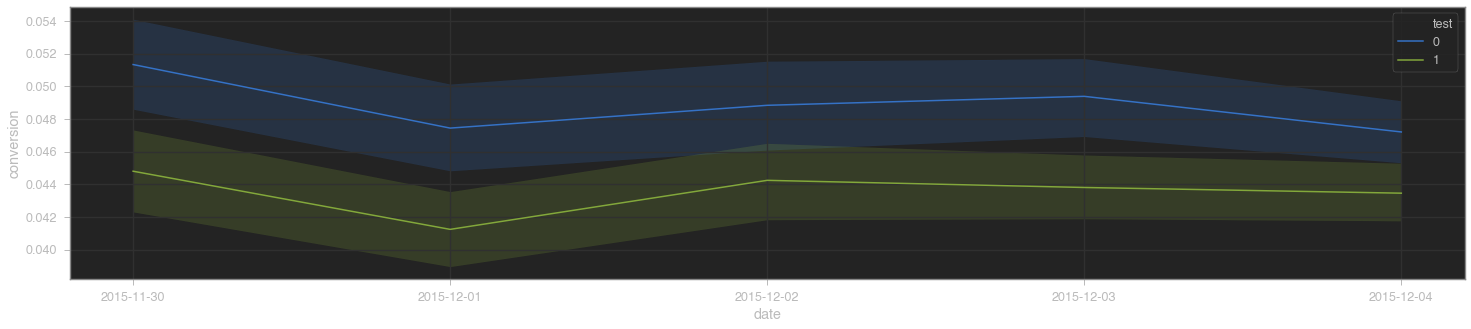

In [91]:
plt.figure(figsize = (25,5))
sns.lineplot(x = 'date', y = 'conversion', data = df1, hue = 'test')

In [102]:
df1['date'] = pd.to_datetime(df1['date'])

<ipython-input-102-e448b256dc75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])


In [115]:
df1['date'] = df1['date'].dt.date

<ipython-input-115-d54835258af3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['date'].dt.date


In [106]:
df1['date'].dt.dayofweek.value_counts()

4    103811
3     73299
0     52449
1     52401
2     52054
Name: date, dtype: int64

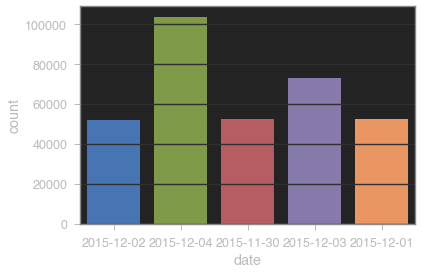

In [117]:

sns.countplot(df1['date'])

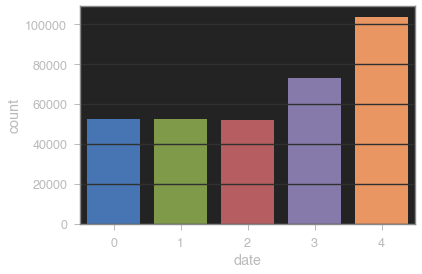

In [112]:
sns.countplot(df1['date'].dt.weekday)

In [118]:
dates = df1['date'].unique()


In [119]:
dates

array([datetime.date(2015, 12, 2), datetime.date(2015, 12, 4),
       datetime.date(2015, 11, 30), datetime.date(2015, 12, 3),
       datetime.date(2015, 12, 1)], dtype=object)

In [125]:
print('{:>10} {:>10} {:>10}'.format('Date', 'Z-score', 'pvalue'))
print('-' * 65)
for d in dates:
    control = df1[(df1['test'] == 0) & (df1['date'] == d)]
    test = df1[(df1['test'] == 1) & (df1['date'] == d)]
    con_success = sum(control['conversion'] == 1)
    con_size = control.iloc[:,0].count()
    exp_success = sum(test['conversion'] == 1)
    exp_size = test.iloc[:,0].count()
    zscore, pvalue = two_proprotions_ztest(con_success, con_size, exp_success, exp_size)
    print('{:%Y-%m-%d} {:>10} {:>10}'.format(d, zscore, pvalue))

      Date    Z-score     pvalue
-----------------------------------------------------------------
2015-12-02 2.484212713993962 0.0064919112441156335
2015-12-04 2.8966694570772087 0.0018857344785917496
2015-11-30 3.4923333825953744 0.00023941010875661028
2015-12-03 3.5797311064462374 0.00017197397351298438
2015-12-01 3.444117822132227 0.00028646298749401833
